# Tutorial 4.2: Visualization with Matplotlib Part 2
Python for Data Analytics | Module 4
<br>Professor James Ng

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

# Matplotlib Scatter Plots

In this section we are going to learn how to create scatter plots in Matplotlib with the **`axes.scatter()`** method.

<div class="alert alert-block alert-info">
<p>You _can_ actually use the `plot()` method we covered in the previous tutorial to generate scatter plots as well.</p>
<p>
But you should generally use the method we are covering in this tutorial unless you are having significant performance problems.
</p>
<p>The reason for this is that the `axes.scatter()` method provides more control over the visualization. It does this at the cost of performance, but this should only be a factor for plots with huge amounts of data points.</p>
</div> 

### Load Necessary Data Set(s)

In [4]:
seattle_weather_2015_2016 = pd.read_csv(
    'https://www3.nd.edu/~jng2/seattle_weather_2015_2016.csv', date_parser=['date'])
seattle_weather_2015_2016.head(-1)

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
0,1/1/15,23.2,51.1,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
1,1/2/15,41.0,54.0,0.00,0.0,0.0,2.91,No,No,No,No,No,No,No,No,No
2,1/3/15,46.0,51.1,0.16,0.0,0.0,3.80,Yes,No,No,No,No,No,No,No,No
3,1/4/15,48.9,69.1,0.29,0.0,0.0,10.07,Yes,No,No,No,No,No,No,No,No
4,1/5/15,32.0,55.9,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No
5,1/6/15,26.2,55.0,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
6,1/7/15,16.2,39.0,0.00,0.0,0.0,6.26,No,No,No,No,No,No,No,No,No
7,1/8/15,11.1,27.1,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No
8,1/9/15,22.1,45.0,0.00,0.0,0.0,8.28,No,No,No,No,No,No,No,No,No
9,1/10/15,22.1,39.0,0.00,0.0,0.0,1.57,No,No,No,No,No,No,No,No,No


## Scatter Plots
Let's start exploring Matplotlib's **`axes.scatter()`** method's functionality by charting the precipitation records from our dataframe.

### A Simple Scatter Plot

In [5]:
# Here I am choosing to set the date column as the index for the DataFrame
seattle_weather_2015_2016.set_index('date', inplace=True)

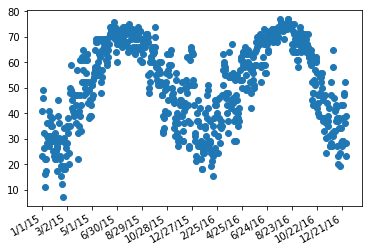

In [6]:
figure, axes = plt.subplots()

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'])

# set x-axis ticks to display every 60 days, else too crowded
axes.set_xticks(axes.get_xticks()[::60])
# automatically rotate dates
figure.autofmt_xdate()

#### Adjusting Marker Color(s)
With scatter plots, you can assign a single color to each plot, just like you can with line plots. The only difference here is that you use the **`c`** parameter rather than **`color`**.

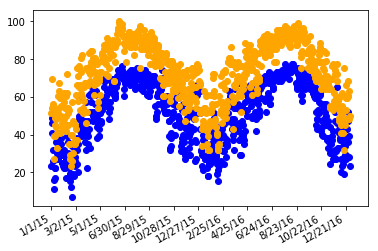

In [7]:
figure, axes = plt.subplots()

# We'll plot high and low temps with different colors.
axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c='blue')

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'], 
             c='orange')

# set x-axis ticks to display every 60 days, else too crowded
axes.set_xticks(axes.get_xticks()[::60])
# automatically rotate dates
figure.autofmt_xdate()

<div class="alert alert-block alert-info">
<p>Technically, you can use the `color` argument, but if you do, it won't work with the next technique.</p>
</div> 

But you can also assign a unique color to each marker in your plot - which can lead to some very cool and powerful visualizations.

The key here is that you have to use two arguments in combination: 
* **`c`**: Previously, we only used this as a single value argument, but now you have to pass it a list/array that contains a numeric element for each data point in your plot. You have to have the exact same number of elements as plot items or you will get an error.
* **`cmap`**: A valid colormap name. Matplotlib automatically converts all your numeric values in **`c`** to a float between 0 and 1 and then picks the corresponding color out of a given colormap for each marker. There are many different colormaps available. You can see many of the available options in Matplotlib's <a href="https://matplotlib.org/users/colormaps.html" target="_blank">online documentation</a>.

Now let's provide a couple of examples:

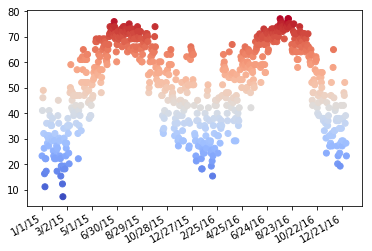

In [8]:
figure, axes = plt.subplots()

# We'll plot high and low temps with different colors.
# We will pair our low temp ratings to the colormap
# itself so that low temps will get mapped to one
# end of the colormap and higher temps to the other.
axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='coolwarm')

# set x-axis ticks to display every 60 days, else too crowded
axes.set_xticks(axes.get_xticks()[::60])
# automatically rotate dates
figure.autofmt_xdate()

#### Adding a Colorbar

<div class="alert alert-block alert-warning">
<p>Adding a colorbar requires interacting with the `figure` object directly. This is the first time that we've done this.</p>
</div> 

When you have a plot of a continous variable(s) where color is used to signify the values of the variable a colorbar is a great addition to your plot.

To add a colorbar to your plot, you use the **`figure.colorbar()`** method.

The method requires a single argument: an image which has been "painted" onto an *`axes`* object.

It just so happens that when you call the *`axes.scatter`* method, it not only plots such an image, but it also returns a reference to that image.

Up until now, we've just ignored it, but now let's capture it so that we can pass it along to **`figure.colorbar`**:

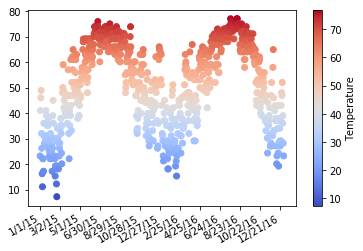

In [9]:
figure, axes = plt.subplots()

scatter_image = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='coolwarm')

figure.colorbar(
    scatter_image,
    label='Temperature' # You can also add a label
)

# set x-axis ticks to display every 60 days, else too crowded
axes.set_xticks(axes.get_xticks()[::60])
# automatically rotate dates
figure.autofmt_xdate()

The above plot is cool to look at. However, temperature color (and its colorbar) is redundant since temperature is already given by the y-axis.

A better use of color and colorbar here is to display another metric such as average wind speed.

From the plot below, it looks like the highest wind speeds tend to occur when temps are above 40.

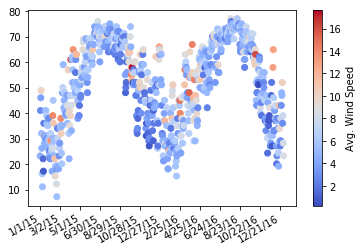

In [10]:
figure, axes = plt.subplots()

scatter_image = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['avgwindspeed'], 
             cmap='coolwarm')

figure.colorbar(
    scatter_image,
    label='Avg. Wind Speed' # You can also add a label
)

# set x-axis ticks to display every 60 days, else too crowded
axes.set_xticks(axes.get_xticks()[::60])
# automatically rotate dates
figure.autofmt_xdate()

You can also add multiple colorbars:

# Matplotlib Histograms

In this section, we are going to learn how to create histograms, which are a great way of summarizing data sets.

The basic idea of a histogram is to create "buckets" into which your data points fall into and display those rather than individually displaying all the data points.

In [11]:
nd_football_roster = pd.read_csv('https://www3.nd.edu/~jng2/nd-football-roster-2019.csv')


In [12]:
# Select a style, it will affect all subsequent plots.
# Showing you different style 'fivethirtyeight'
plt.style.use('fivethirtyeight')

## One Dimensional Histograms
Simple, one dimensional histograms are created with the **`axes.hist()`** method.

### A Basic Histogram
This create a basic histogram: you simply have to pass a NumPy array or Pandas series object to it. 

By default, it will create a set of buckets from the values in your array/series along the x-axis and then display how many elements fall in each bucket via the y-axis.

(array([ 3.,  5., 10., 13., 18., 21., 13., 14.,  8.,  6.]),
 array([68. , 69.1, 70.2, 71.3, 72.4, 73.5, 74.6, 75.7, 76.8, 77.9, 79. ]),
 <a list of 10 Patch objects>)

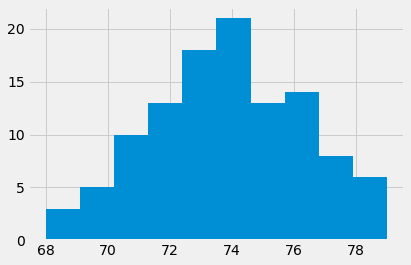

In [13]:
# Create a histogram of ND Football Player Heights
# You can quickly see the most common height bucket
# on the team.
figure, axes = plt.subplots()
axes.hist(nd_football_roster['Height'])

As always, you can adjust the title, label, and legend properties of the **`axes`** object.

Text(0,0.5,'Count of Players')

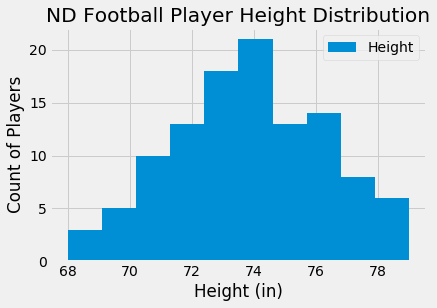

In [14]:
# Adding title, labels, and legend
figure, axes = plt.subplots()
axes.hist(nd_football_roster['Height'])
axes.legend()
axes.set_title('ND Football Player Height Distribution')
axes.set_xlabel('Height (in)')
axes.set_ylabel('Count of Players')

### Customizing Histograms

#### Changing the Number of Bins
Matplotlib tries to guess the number of bins you want for your histograms and it generally does a good job at this. Nonetheless, you may want to increase/decrease the default to adjust the granularity of your plot.

You can do so with the `bins` parameter.

(array([ 1.,  2.,  5.,  1., 12., 10., 18.,  6., 15., 12.,  8.,  7.,  8.,
         5.,  1.]),
 array([68.        , 68.73333333, 69.46666667, 70.2       , 70.93333333,
        71.66666667, 72.4       , 73.13333333, 73.86666667, 74.6       ,
        75.33333333, 76.06666667, 76.8       , 77.53333333, 78.26666667,
        79.        ]),
 <a list of 15 Patch objects>)

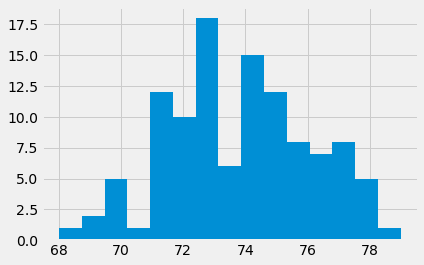

In [15]:
figure, axes = plt.subplots()

# Adjust the number of bins to 15
# The increased granularity will
# expose some heights that aren't represented
# on the team.
axes.hist(nd_football_roster['Height'], bins=15)

#### Changing a Range for Bins
We know that we can use the `axes.set_xlim` and `axes.set_ylim` methods to focus/zoom into one area of a plot.

The **`range`** parameter is somewhat similar functionally to this in that it allows you to specify the range of input values to plot.

The key difference is that when you use the **`range`** parameter, Matplotlib does all the binning/grouping within the range specified. This allows you to tailor the histogram to a subset of your data.


With `set_xlim`/`set_ylim` you would simply zoom into a smaller area of the plot. 
Let's demonstrate using our Seattle Weather dataset.

(array([674.,  35.,  17.,   4.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.   , 0.645, 1.29 , 1.935, 2.58 , 3.225, 3.87 , 4.515, 5.16 ,
        5.805, 6.45 ]),
 <a list of 10 Patch objects>)

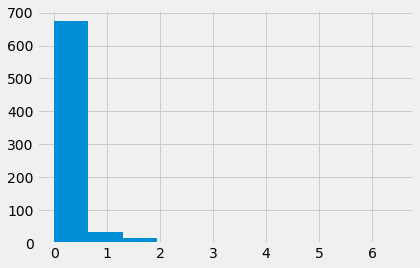

In [16]:
# Simply plot the precipitation records
# with default parameters.
figure, axes = plt.subplots()
axes.hist(seattle_weather_2015_2016['precipitation'])

Because there are so many records with no rain, it skews the chart. If fact, the distortion is so high, that we can't visually make out any records above 2 inches (though we know they must be there because of the bins Matplotlib created).

Let's zoom in to the precipitation range of between .5 and 2.5 inches:

(0.5, 2.5)

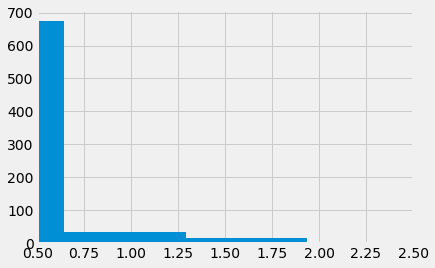

In [17]:
# Simply plot the precipitation records
# with default parameters.
figure, axes = plt.subplots()
axes.hist(seattle_weather_2015_2016['precipitation'])
axes.set_xlim(0.5,2.5)

As you can see above, it did zoom in the range we wanted between 0.5 and 2.5, but the "binning" is still too coarse. **This is why we use range parameter rather than set_xlim.**

(array([19., 12.,  9.,  8.,  5.,  7.,  4.,  3.,  1.,  0.]),
 array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5]),
 <a list of 10 Patch objects>)

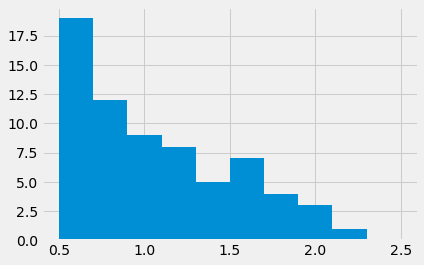

In [18]:
# This will give us a plot of how many
# reasonably, but not extremely, rainy days
# Seattle experienced in 2015-2016
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['precipitation'], 
    range=(.5, 2.5))

### Overlaying Multiple Histograms
Just like we are able to plot multiple lines on a single axes, we can plot multiple histograms. 

(array([ 1.,  2.,  5., 12., 24., 24., 42., 37., 39., 32., 46., 45., 43.,
        42., 40., 53., 57., 82., 72., 33.]),
 array([ 7.2 , 10.69, 14.18, 17.67, 21.16, 24.65, 28.14, 31.63, 35.12,
        38.61, 42.1 , 45.59, 49.08, 52.57, 56.06, 59.55, 63.04, 66.53,
        70.02, 73.51, 77.  ]),
 <a list of 20 Patch objects>)

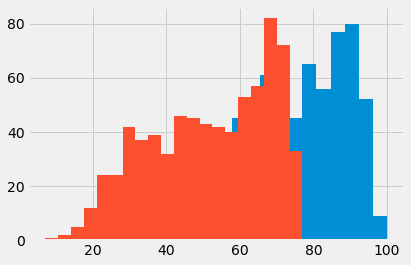

In [19]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20)

That is pretty cool, but there are a number of things that are not ideal with our plot:
1. The low temperatures are in red. 
2. The low temperatures are covering up the high temperatures.
3. There is no legend to clearly deliniate which is which.

Let's combine what we've learned so far about Matplotlib to address these issues.

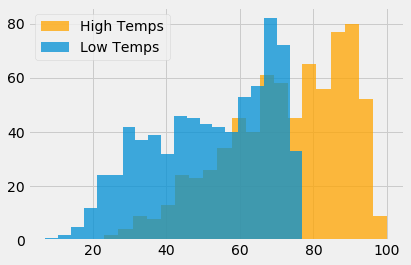

In [20]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20, 
    label='High Temps', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75 # Adjust alpha to allow both datasets to appear
)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20, 
    label='Low Temps', # Use label to specify legend name
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()

## Activity

### Two Overlapping Histograms

Using the starter code in the two cells below,
* Create two DataFrames by extracting player details of class 'SR' (seniors) and 'FR' (freshmen)

* Plot overlapping histograms of weight ('Weight') for each of SR' and 'FR' classes
    * Adjust these parameters for each histogram
        * color
        * alpha (opacity)
        * label
    * Provide a legend to indicate class

In [21]:
roster_sr = nd_football_roster[ ??? ]
roster_fr = nd_football_roster[ ??? ]


SyntaxError: invalid syntax (<ipython-input-21-c48d37ab771a>, line 1)

NameError: name 'roster_sr' is not defined

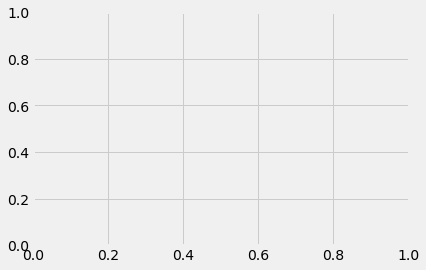

In [22]:
figure, axes = plt.subplots()
axes.hist(roster_sr['Weight']) # adjust parameters to improve on the plot 
axes.hist(roster_fr['Weight']) # adjust parameters to improve on the plot 
axes.legend()
axes.set_title("Weight of SR vs FR classes")
axes.set_xlabel("Weight")
axes.set_ylabel("Number of players")

## Two Dimensional Histograms

In the previous section, we demonstrated how to generate a histogram on a single variable in a data set. In this section, we are going to cover how you can create 2 dimensional histograms to visualize the relationship between two variables in a data set.

We will start by going back to our ND football roster and create a plot that shows the relationships between player heights and weights.

Text(0,0.5,'Weight')

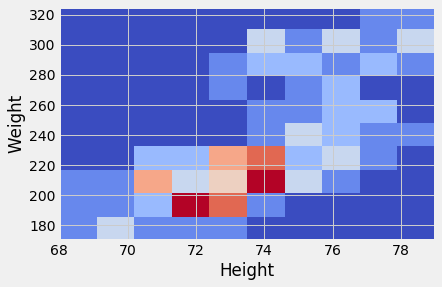

In [23]:
figure, axes = plt.subplots()
image = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='coolwarm', # Notice we use `cmap` to specify color range
)

axes.set_xlabel("Height")
axes.set_ylabel("Weight")

If you recall from our previous section, we have to pass an image to the *`figure.colorbar()`* method in order for it to work correctly.

Unlike the *`axes.scatter()`* method, the *`axes.hist2d`* method returns a 4 element tuple. The last element is the image reference that we need to pass into *`figure.colorbar()`*. **This is a idiosyncratic thing to keep track**

Text(0,0.5,'Weight')

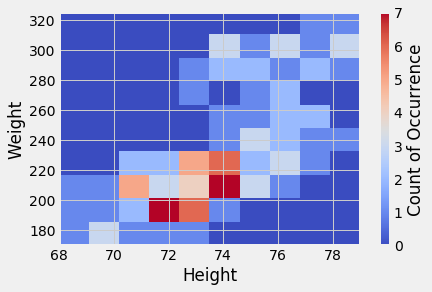

In [24]:
figure, axes = plt.subplots()

results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='coolwarm')

# Pass in the 4th element (index 3)
figure.colorbar(results[3], label='Count of Occurrence')


axes.set_xlabel("Height")
axes.set_ylabel("Weight")

In [25]:
results

(array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [3., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 2., 5., 2., 0., 0., 0., 0., 0., 0.],
        [1., 7., 3., 2., 0., 0., 0., 0., 0., 0.],
        [1., 6., 4., 5., 0., 0., 1., 1., 0., 0.],
        [0., 1., 7., 6., 1., 1., 0., 2., 3., 0.],
        [0., 0., 3., 2., 3., 1., 1., 2., 1., 0.],
        [0., 0., 1., 3., 2., 2., 2., 1., 3., 0.],
        [0., 0., 0., 1., 1., 2., 0., 2., 1., 1.],
        [0., 0., 0., 0., 1., 0., 0., 1., 3., 1.]]),
 array([68. , 69.1, 70.2, 71.3, 72.4, 73.5, 74.6, 75.7, 76.8, 77.9, 79. ]),
 array([170. , 185.5, 201. , 216.5, 232. , 247.5, 263. , 278.5, 294. ,
        309.5, 325. ]),
 <matplotlib.image.AxesImage at 0x7f654d59fe80>)

### Reduce clutter with the `cmin` & `cmax` arguments
In both of our examples, there is a lot of visual noise that comes from the bins that have 0 occurences. We can remove this clutter by specifying the `cmin` (count minimum) argument.

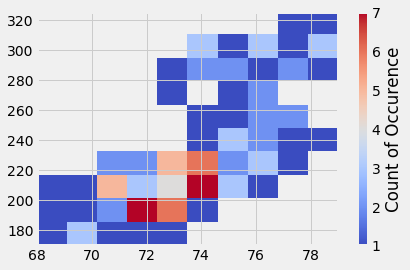

In [26]:
figure, axes = plt.subplots()
results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'],
    cmap='coolwarm',
    cmin=1)

figure.colorbar(results[3], label='Count of Occurence')

# Making Interactive Plots

Instead of saying `%matplotlib inline` if you used **`%matplotlib notebook`** you can interact with your plots (pan, zoom in/out).

In [27]:
# Add this before a plot to display your plot and interact with it
%matplotlib notebook

<IPython.core.display.Javascript object>


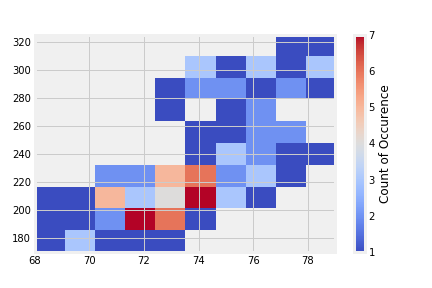

In [28]:
%matplotlib notebook

figure, axes = plt.subplots()
results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'],
    cmap='coolwarm',
    cmin=1)

figure.colorbar(results[3], label='Count of Occurence')